#Vowpal Wabbit parameter estimation    
##MNIST PCA data

https://github.com/JohnLangford/vowpal_wabbit/wiki/Command-line-arguments
    


In [30]:
import re
import csv
import subprocess
from time import ctime

import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
%matplotlib inline

In [31]:
#%qtconsole

In [32]:
!rm cv_train_pca.vw.cache

In [33]:
vw_input_file = 'data/mnist_train_pca.vw'

path_to_cache = 'cv_train_pca.vw.cache'  # <-- this is the file removed, above

output_file   = 'vw_cv_parms_tested.csv'
 
# ===================================================================
# REMEMBER: remove the parameter you're testing
#           and put it back with its best value when you're done
# ===================================================================
vw_params = '-d ' + vw_input_file + '   --oaa 10  -f cv.model ' + \
            ' -q ii -b 19 -l 0.4 --power_t 0.6 --decay_learning_rate  1 --initial_t 0 ' + \
            ' --passes 35 --early_terminate 3 '
# ===================================================================

###

def get_loss( output ):
	pattern = r"average\s+loss\s+=\s+([0-9.e]+)+"
	m = re.search( pattern, output )
	loss = m.group( 1 )
	return loss

###

o_f = open( output_file, 'wb' )
writer = csv.writer( o_f )
writer.writerow( [ 'bits', 'loss' ] )

# =============================================
# ========= parameter ranges to test ==========

# --------------------------------------------------------
# with --early_terminate is there any reason not to simply
# set --passes to a very large number?
# --------------------------------------------------------

#param       = "-b"
#param_name  = param + " hash table entry bit size"
#param_range = range(12, 30+1, 1)

#param       = "-l"
#param_name  = param + " learning rate"
#param_range = np.arange(0.1, 1.1, .1)

#param       = "--power_t"
#param_name  = param
#param_range = np.arange(0, 1.1, .1)

#param       = '--decay_learning_rate'
#param_name  = param
#param_range = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7071068, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5]
# watch for this
# Warning: the learning rate for the last pass is multiplied by: [2.91038e-11] 
# adjust --decay_learning_rate larger to avoid this.

#param       = '--initial_t'
#param_name  = param
#param_range = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# ========= parameter ranges to test ==========
# =============================================

for b in param_range:
	
	cmd = 'vw {} --cache_file {} {} {} 2>&1'.format( vw_params, path_to_cache, param, b )	
	print cmd
	
	output = subprocess.check_output( '{} | tee /dev/stderr'.format( cmd ), shell = True )
	loss = get_loss( output )
	
	print "\n{}  {}, loss: {}\n{}\n".format( param_name, b, loss, ctime() )
	
	writer.writerow( [ b, loss ] )
	o_f.flush()


vw -d data/mnist_train_pca.vw   --oaa 10  -f cv.model  -q ii -b 19 -l 0.4 --power_t 0.6 --decay_learning_rate  1  --passes 35 --early_terminate 3  --cache_file cv_train_pca.vw.cache --initial_t 0 2>&1

--initial_t  0, loss: 0.009000
Thu Jul 23 09:47:28 2015

vw -d data/mnist_train_pca.vw   --oaa 10  -f cv.model  -q ii -b 19 -l 0.4 --power_t 0.6 --decay_learning_rate  1  --passes 35 --early_terminate 3  --cache_file cv_train_pca.vw.cache --initial_t 1 2>&1

--initial_t  1, loss: 0.009000
Thu Jul 23 09:49:44 2015

vw -d data/mnist_train_pca.vw   --oaa 10  -f cv.model  -q ii -b 19 -l 0.4 --power_t 0.6 --decay_learning_rate  1  --passes 35 --early_terminate 3  --cache_file cv_train_pca.vw.cache --initial_t 2 2>&1

--initial_t  2, loss: 0.009083
Thu Jul 23 09:52:00 2015

vw -d data/mnist_train_pca.vw   --oaa 10  -f cv.model  -q ii -b 19 -l 0.4 --power_t 0.6 --decay_learning_rate  1  --passes 35 --early_terminate 3  --cache_file cv_train_pca.vw.cache --initial_t 3 2>&1

--initial_t  3, loss:

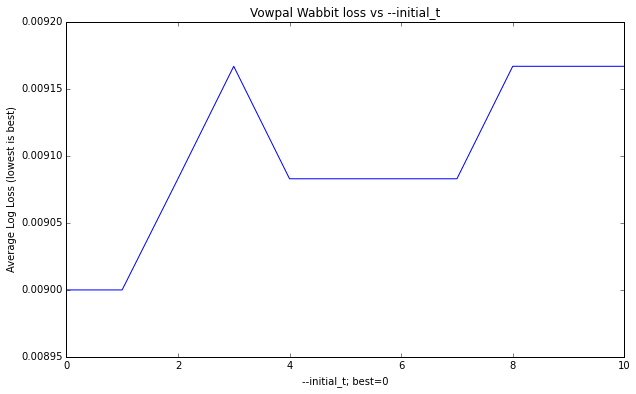

In [34]:
input_file = output_file

d = pd.read_csv( input_file )

plt.figure(figsize=(10,6))
plt.title("Vowpal Wabbit loss vs {0}".format(param_name) )
plt.xlabel("{0}; best={1}".format(param_name, d.bits[np.argmin(d.loss)]) )

plt.plot( d.bits, d.loss )
plt.ylabel("Average Log Loss (lowest is best)")
plt.axvline(x=d.bits[np.argmin(d.loss)])

plt.show()